# Chapter 5, Example 2a
## 3-fold cross-validation on Iris dataset

In [1]:
import torch
from torch import nn

from sklearn import datasets
from sklearn.model_selection import KFold

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lr = 0.1
no_epochs = 1000

no_labels = 3
no_features = 4
hidden_units = 5

no_folds = 3

seed = 10
torch.manual_seed(seed)
np.random.seed(seed)

In [3]:
no_inputs = 4
no_outputs = 3

# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

no_data = len(iris.data)

X = iris.data

# convert the targets into one-hot matrix
Y = np.zeros((no_data, no_outputs))
for i in range(no_data):
    Y[i, iris.target[i]] = 1
    
print(np.shape(X))
print(np.shape(Y))

(150, 4)
(150, 3)


In [4]:
class FFN(nn.Module):
    def __init__(self, no_features, hidden_units, no_labels):
        super().__init__()
        self.relu_stack = nn.Sequential(
            nn.Linear(no_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, no_labels),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.relu_stack(x)
        return logits

In [5]:
cv = KFold(n_splits=no_folds, shuffle=True, random_state=1)

fold = 0
acc = []
for train_idx, test_idx in cv.split(X, Y):
    x_train, y_train  = X[train_idx], Y[train_idx]
    x_test, y_test = X[test_idx], Y[test_idx]
    
    model = FFN(no_features, hidden_units, no_labels)
    
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(no_epochs):
        pred = model(torch.tensor(x_train, dtype=torch.float))
        loss = loss_fn(pred, torch.tensor(y_train, dtype=torch.float))
    
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    pred = model(torch.tensor(x_test, dtype=torch.float))
    acc_ = (pred.argmax(1) == torch.tensor(y_test, dtype=torch.float).argmax(1)).type(torch.float).mean()
    
    acc.append(acc_.item())
    
    print('fold %d test accuracy %g'%(fold, acc[fold]))
    fold += 1
    
print('* mean accuracy = %g *'% np.mean(acc))

fold 0 test accuracy 0.98
fold 1 test accuracy 0.98
fold 2 test accuracy 0.96
* mean accuracy = 0.973333 *


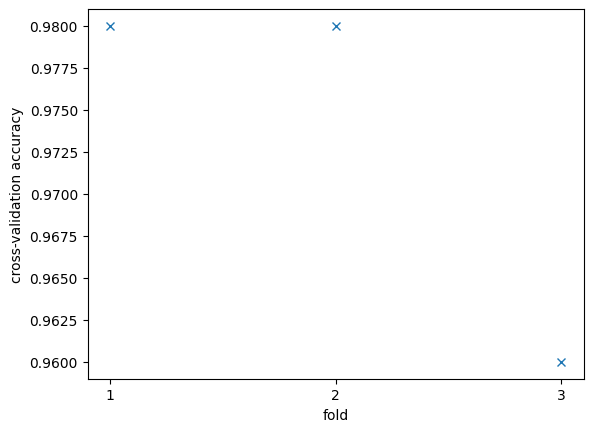

In [6]:
plt.figure(1)
plt.plot([1, 2, 3], acc, marker = 'x', linestyle = 'None')
plt.xticks([1, 2, 3])
plt.xlabel('fold')
plt.ylabel('cross-validation accuracy')
plt.show()